### Preprocessing 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [2]:
data_adult=pd.read_csv('C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/Data_adult.csv',index_col=0)
sns.set(style='ticks')

### Age, bmi and avg_glucose_level are the only continuous variables in the dataset. avg_glucose_level values have bimodal distribution and bmi distribution is skewed to the right which can affect a perfomance of as selected model. Therefore it is reasonable to transform these features into categories. 

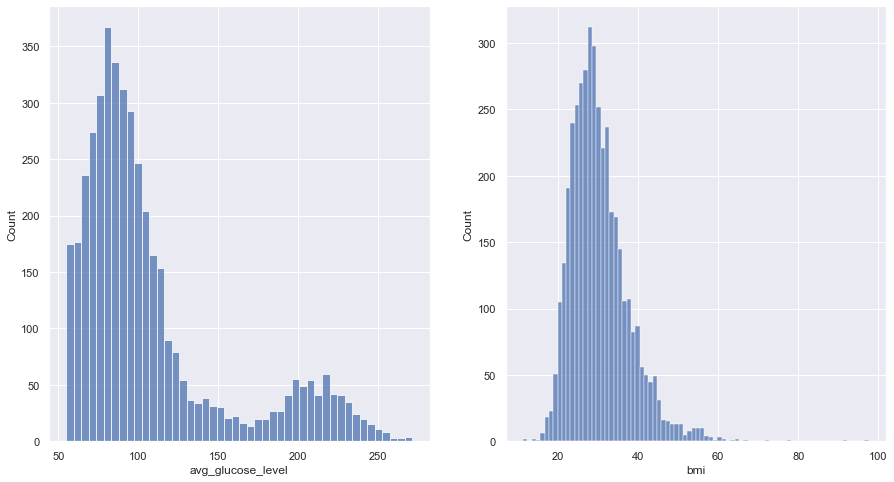

In [3]:
sns.set(rc = {'figure.figsize':(15,8)})
fig, ax =plt.subplots(1,2)
sns.histplot(data_adult['avg_glucose_level'], ax=ax[0])
sns.histplot(data_adult['bmi'], ax=ax[1]);

### To transform bmi features, we will use universally accepted bmi ranges as follows:
* below 18.5 – underweight 
* between 18.5 and 24.9 – normal weight 
* between 25 and 29.9 – overweight 
* between 30 and 39.9 – obesity 

In [4]:
data_adult['bmi'] = pd.cut(data_adult['bmi'].dropna(),
                         [0,18.5, 24.9, 29.9,100],labels=["underweight", "normal", "overweight","obese"])

### Next we can put all NaN values into 'unknown' category.

In [5]:
data_adult['bmi'] = data_adult['bmi'].astype('object')
data_adult.bmi = data_adult.bmi.fillna('unknown')

In [6]:
data_adult.bmi.value_counts()

obese          1871
overweight     1331
normal          886
unknown         183
underweight      42
Name: bmi, dtype: int64

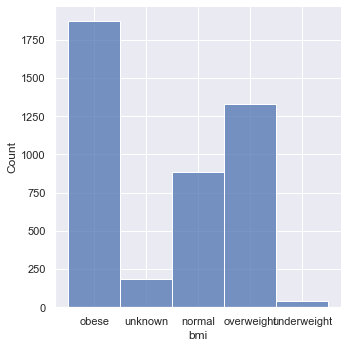

In [7]:
sns.displot(data=data_adult,x='bmi');

### We will replace glucose values with categories as follows:
* below 140 - normal
* 140-199 - prediabetes
* over 200 - diabetes

In [8]:
data_adult['avg_glucose_level'] = pd.cut(data_adult['avg_glucose_level'],
                         [0,139.9, 199.9, 300],labels=["normal", "prediabetes", "diabetes"])

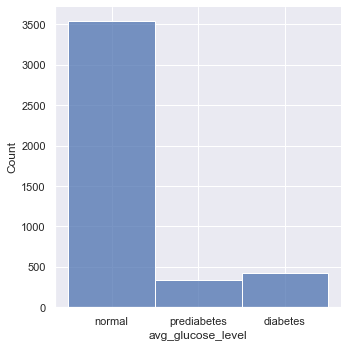

In [9]:
sns.displot(data=data_adult,x='avg_glucose_level');

In [10]:
data_adult.rename(columns={"avg_glucose_level": "glucose_level"},inplace=True)

In [11]:
#sns.barplot(x='bmi',y='stroke',data=data_adult)

### We will also divide age into several bins.

In [12]:
data_adult['age'] = pd.cut(data_adult['age'],
                         [0, 18, 30, 45, 60, 80, 99])

In [13]:
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313 entries, 0 to 4313
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          4313 non-null   object  
 1   age             4313 non-null   category
 2   hypertension    4313 non-null   int64   
 3   heart_disease   4313 non-null   int64   
 4   ever_married    4313 non-null   object  
 5   work_type       4313 non-null   object  
 6   Residence_type  4313 non-null   object  
 7   glucose_level   4313 non-null   category
 8   bmi             4313 non-null   object  
 9   smoking_status  4313 non-null   object  
 10  stroke          4313 non-null   int64   
dtypes: category(2), int64(3), object(6)
memory usage: 474.8+ KB


### Split data set

In [14]:
y = data_adult[['stroke']]
X = data_adult.drop(['stroke'],axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Next we need to encode variables.
### Since all categorical variables have K mutually exclusive categories, we actually only need K – 1 new dummy variables to encode the same information. Therefore we can use drop_first = True

In [16]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3019, 22), (1294, 22), (3019, 1), (1294, 1))

### Next we will save 4 separate dataframes to use in modeling.

In [17]:
X_train.to_csv(r'C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/X_train.csv', index=True,header=True)
X_test.to_csv(r'C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/X_test.csv', index=True,header=True)
y_train.to_csv(r'C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/y_train.csv', index=True,header=True)
y_test.to_csv(r'C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/y_test.csv', index=True,header=True)

### Next step - Modeling
Next we will train different models and evaluate the performance to select one optimal model.